<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM3_(4_16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and analyzes the third IPCC Working Group III report published in 2001. After their brief detour from "Mitigations" in the second assessment report, the working group has returned to a report clearly dedicated to "Mitigations." The  PDF is 754 pages, and a permanent link is available [here](https://archive.ipcc.ch/ipccreports/tar/wg3/index.php?idp=0). I converted the PDF into a TXT file with ABBY Fine Reader 14.**

## Cleaning
In this section, I clean the files for analysis. 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [5]:
with open("/content/IPCC3M.txt", "r", encoding='utf-8') as text:
    IPCCM3 = text.read()

In [6]:
MC1=IPCCM3.lower() # remove casing
MC2=MC1
print(MC2[:500])

﻿climate change 2001
mitigation
wr

contribution of working group iii to the third assessment report of the intergovernmental panel on climate change
summary for policymakers
climate change 2001: mitigation
a report of working group iii
of the intergovernmental panel on climate change
this summary, approved in detail at the sixth session of ipcc working group iii (accra, ghana • 28 february - 3 march 2001), represents the formally agreed statement of the ipcc concerning climate change mitigation


In [7]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [8]:
MC4=remove_Stopwords(MC3)

In [9]:
MC5=lemmatize_text(MC4)

In [10]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [11]:
IPCCM3words= MC6.split()
print('Number of words in IPCCM3:',len(IPCCM3words))

Number of words in IPCCM3: 358584


In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]

print(MC7) # unclear if this means it's not performing the function? 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
MC8= [word for word in MC7 if word.isalnum()] # need to join this
print(MC8)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
from nltk import FreqDist
freq = FreqDist(MC8)
print(freq.most_common(100))

[('emission', 4148), ('energy', 3361), ('cost', 3184), ('policy', 2886), ('change', 2514), ('country', 2298), ('climate', 2160), ('mitigation', 2121), ('technology', 2072), ('carbon', 1718), ('scenario', 1678), ('reduction', 1565), ('1998', 1530), ('economic', 1467), ('1999', 1450), ('development', 1431), ('et', 1396), ('al', 1390), ('gas', 1274), ('environmental', 1269), ('global', 1226), ('use', 1209), ('may', 1154), ('potential', 1153), ('international', 1086), ('study', 1074), ('sector', 1063), ('1997', 1046), ('model', 1019), ('also', 1015), ('fuel', 1011), ('market', 1003), ('benefit', 1001), ('tax', 994), ('impact', 952), ('ghg', 935), ('system', 934), ('efficiency', 917), ('2000', 911), ('co2', 907), ('option', 885), ('u', 883), ('new', 859), ('level', 823), ('analysis', 810), ('effect', 809), ('greenhouse', 783), ('1996', 756), ('technological', 718), ('result', 716), ('world', 711), ('1995', 699), ('national', 691), ('future', 689), ('j', 671), ('r', 661), ('developing', 659)

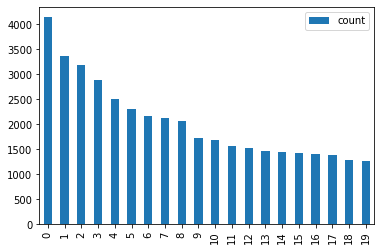

In [15]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [16]:
print(df)

             word  count
0        emission   4148
1          energy   3361
2            cost   3184
3          policy   2886
4          change   2514
5         country   2298
6         climate   2160
7      mitigation   2121
8      technology   2072
9          carbon   1718
10       scenario   1678
11      reduction   1565
12           1998   1530
13       economic   1467
14           1999   1450
15    development   1431
16             et   1396
17             al   1390
18            gas   1274
19  environmental   1269


In [19]:
MC9=','.join(MC8)


In [20]:
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC9}) 
df

,author,report
0,IPCC,"change,2001,mitigation,wr,contribution,working..."


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

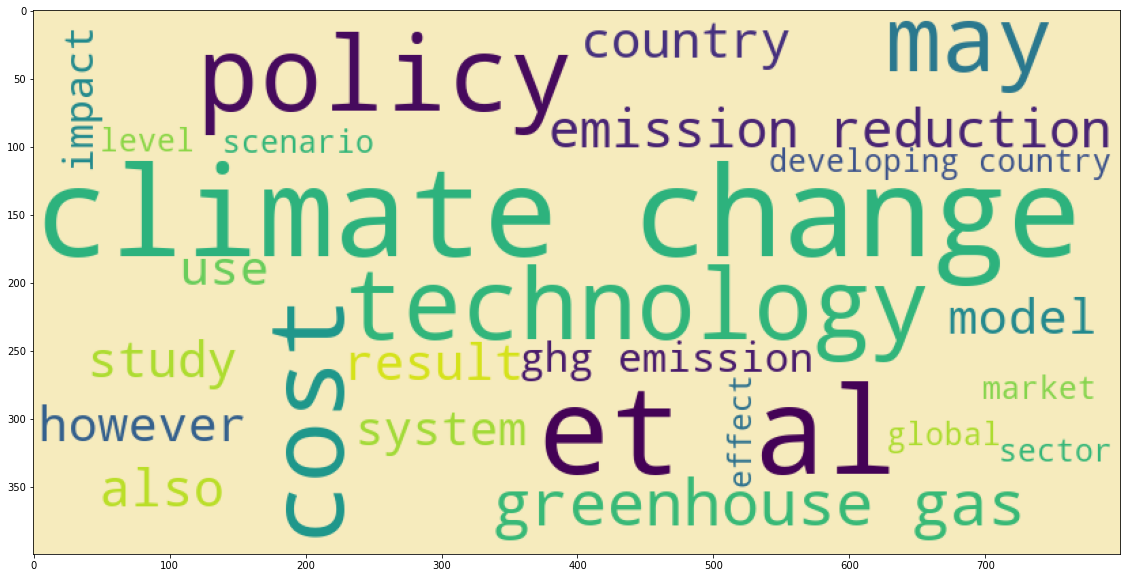

In [22]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=[]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # basic cloud

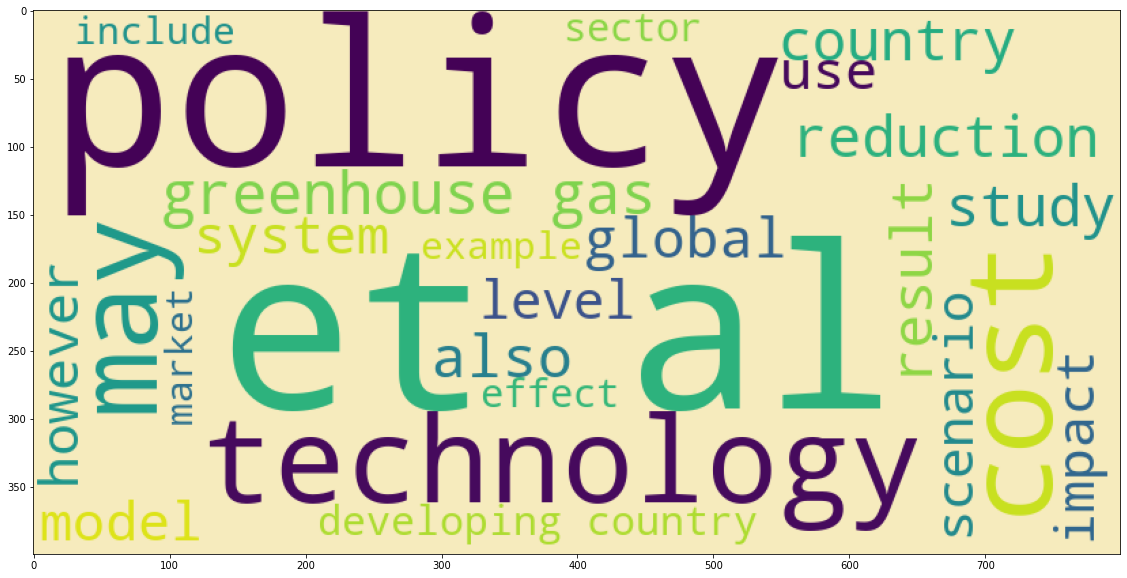

In [23]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["climate", "change", "emission", "emissions"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing some of the more prominent terms

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

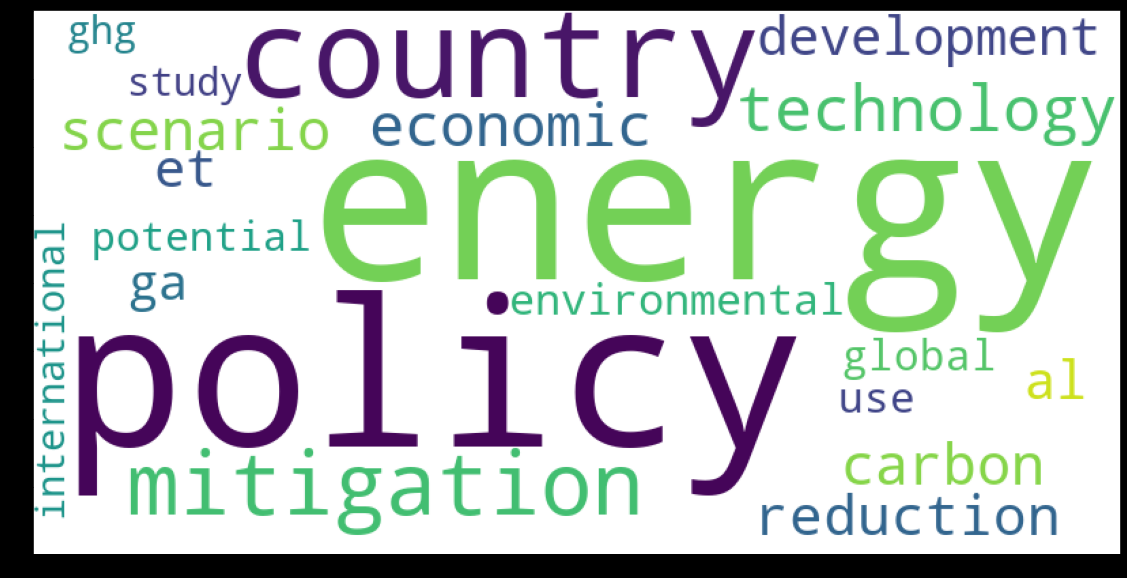

In [24]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=["climate", "change", "emission", "may", "cost"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and select stopwords

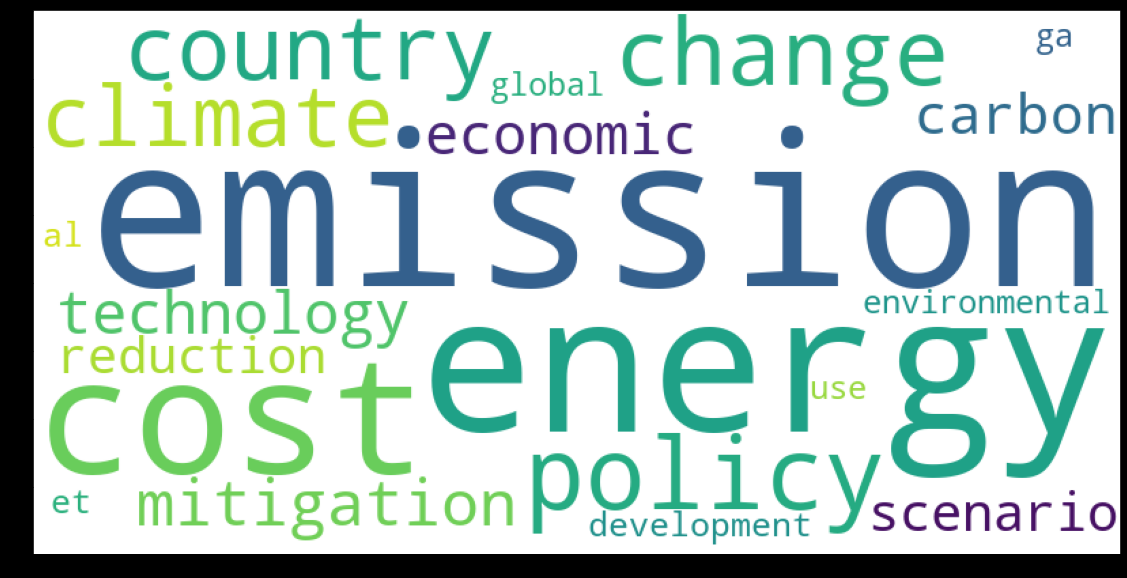

In [25]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=[], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and top 15 terms

In [26]:
occurrences = MC9.count("warming")
print("Number of times the word \'warming\' appears:", occurrences)

Number of times the word 'warming' appears: 124
